<a href="https://colab.research.google.com/github/bablu4195-1/deep-learning-one/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Data Shape: (60000, 28, 28)


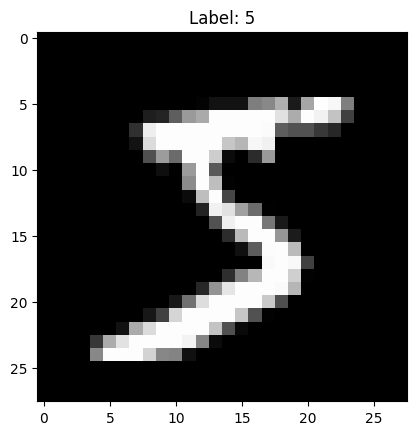

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. Load the MNIST dataset
# X = The images (pixel data)
# y = The labels (the answer key, e.g., "5", "0", "9")
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Check the "Shape" of the data
print(f"Training Data Shape: {X_train.shape}")

# 3. Visualize the first digit just to see what we are working with
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# 1. Initialize the scaffolding
model = Sequential()

# 2. Add the Input Layer (The Flattener)
# Transforms the 28x28 square into a single line of 784 pixels
model.add(Flatten(input_shape=(28, 28)))

# 3. Add the Hidden Layer (The Feature Extractor)
# 128 neurons to find edges, loops, and shapes.
# 'relu' is the standard activation for hidden layers (it's fast!)
model.add(Dense(128, activation='relu'))

# 4. Add the Output Layer (The Scoreboard)
# 10 neurons (one for each digit 0-9)
# 'softmax' converts the scores into probabilities that add up to 100%
model.add(Dense(10, activation='softmax'))

# 5. Compile the Model (Tell it how to learn)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print a summary of what we just built
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Evaluate on the Test Set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Accuracy: {test_acc * 100:.2f}%")

Test Accuracy: 97.63%


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. Load the Data
# We grab the images (X) and the answers (y)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Optional: Normalize the data (Scale pixels from 0-255 down to 0-1)
# This helps the neural network learn faster and better.
X_train, X_test = X_train / 255.0, X_test / 255.0

# 2. Build the Model (The Architecture)
model = tf.keras.models.Sequential([
    # Input: Flatten the 28x28 images
    tf.keras.layers.Flatten(input_shape=(28, 28)),

    # Hidden Layer: 128 neurons looking for features
    tf.keras.layers.Dense(128, activation='relu'),

    # Output Layer: 10 neurons (one for each digit 0-9)
    tf.keras.layers.Dense(10, activation='softmax')
])

# 3. Compile (The Settings)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train (The Learning)
print("--- Starting Training ---")
model.fit(X_train, y_train, epochs=5)

# 5. Evaluate (The Final Exam)
print("\n--- Final Test Evaluation ---")
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


--- Starting Training ---
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8769 - loss: 0.4385
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9638 - loss: 0.1197
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9768 - loss: 0.0762
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9825 - loss: 0.0570
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9867 - loss: 0.0431

--- Final Test Evaluation ---
Test Accuracy: 97.43%


In [5]:
import numpy as np

print(f"Max value in Training Data: {X_train.max()}")
print(f"Min value in Training Data: {X_train.min()}")

Max value in Training Data: 1.0
Min value in Training Data: 0.0


In [3]:
import numpy as np

# 1. Get the model's predictions for the Test Set
predictions = model.predict(X_test)
# Convert probabilities (0.9, 0.01, etc.) to class labels (0, 1, ... 9)
predicted_classes = np.argmax(predictions, axis=1)

# 2. Find the indices where the prediction did NOT match the answer
# This creates a list of all the mistake locations
mistake_indices = np.where(predicted_classes != y_test)[0]

# 3. Plot the first 10 mistakes
plt.figure(figsize=(12, 6))
for i in range(10):
    idx = mistake_indices[i]
    ax = plt.subplot(2, 5, i + 1)

    # Reshape back to 28x28 just in case
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')

    # Title shows the Truth vs. The Mistake
    plt.title(f"True: {y_test[idx]}\nPred: {predicted_classes[idx]}", color='red')
    plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Total Errors found: {len(mistake_indices)}")

NameError: name 'model' is not defined

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. Reshape the data
# CNNs need shape (28, 28, 1) -> (Height, Width, Color Channels)
# -1 means "keep the number of images the same"
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

# 2. Build the CNN
model_cnn = models.Sequential([
    # Step 1: Convolution (Find features like edges)
    # 32 filters, each 3x3 pixels size
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    # Step 2: Max Pooling (Shrink image by half)
    layers.MaxPooling2D((2, 2)),

    # Step 3: Flatten (Grid -> Line)
    layers.Flatten(),

    # Step 4: Dense Layers (The decision makers)
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 3. Compile
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# 4. Train (Notice we use X_train_cnn now)
print("--- Training CNN ---")
model_cnn.fit(X_train_cnn, y_train, epochs=5)

# 5. Evaluate
print("\n--- Final Test Evaluation ---")
test_loss, test_acc = model_cnn.evaluate(X_test_cnn, y_test, verbose=0)
print(f"CNN Test Accuracy: {test_acc * 100:.2f}%")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


--- Training CNN ---
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9096 - loss: 0.3154
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9819 - loss: 0.0595
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9893 - loss: 0.0356
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9922 - loss: 0.0253
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9942 - loss: 0.0177

--- Final Test Evaluation ---
CNN Test Accuracy: 98.68%


In [7]:
# Save the entire model (architecture + weights) to a single file
# We use the modern Keras format (.keras)
model_cnn.save('my_digit_reader.keras')

print("✅ Model saved successfully as 'my_digit_reader.keras'")

✅ Model saved successfully as 'my_digit_reader.keras'
